1. What is a potfolio?

    a) Portfolio = [0.5, 0.5]
    b) Portfolio = [500, 500]
    c) Long-Short, Long-Only and Short-Only Portfolios

2. How is a portfolio managed?
    a) What is the main objective of managing a portfolio?
        > Index and ETFs
        > Market Cap vs Equal Weighted
            i) What are the main variables that we can control?
                a) Which assets/stocks
                b) What percentage of our mondey we put on each asset/stocks
            ii) How do we make these decisions?
                a) Intuition - subject to reasoning errors(cognitive/emotional bias)
                b) Fundamentals (i.e. Book to Price ratio -> Value Factor)
                c) Technical Indicators (Relative Strength -> Momentum Factor)
                d) Quantitative Factor Models including both fundamental and technical indicators.
                    - Diligiously reasearched with rigorous statistical significance tests, backtesting, etc.
                
3. In this Session we will dodnwload data for 3 of the largest companies and we will follow the nest steps
    i)    Look at their historical prices
    ii)   Calculate Returns
    iii)  Calculate Risk (aka volatility, aka standard deviation)
    iv)   Compare them as alternative investment options
    v)    Compare them with S&P500 Index
    vi)   Derive conclusions
    vii)  Construct a very simple portfolio "p" ($1000 USD investmen simulation starting in year 2020).
    viii) Calculate performance metrics: returns, risk, sharpe ratio and maximum drawdown.
    ix)   Compare performance metrics of the "p" portfolio aginst a single stock and agains the S&P500 Index.
    x)    Analyze correlation and its implications for portfolio construction.

     



In [1]:
# Import all the libraries we'll need
import pandas as pd # For datasets
import matplotlib.pyplot as plt # For Plots
import numpy as np # For numerical operations e.g. logarithm

#Tell the application to show the plots within this webpage
%matplotlib inline

# Display only two decimals to avoid distraction
pd.set_option('display.precision', 2)

# Pretty Tables
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

def rets2prices(r):
    prices = (1+r).cumprod()
    prices.iloc[0,:] = 1
    return prices

In [2]:
InteractiveShell.ast_node_interactive = "all"
# Read data from csv files for each stock and show a data sample
data_location = './data/mkt/'

# Define sotcks for study
names = ['S&P500','Microsoft','Walmart','Amazon']
tickers = ['^GSPC','MSFT','WMT','AMZN']

# Load pricing data from the selected stacks, each from one .csv file
for i in range(len(tickers)):
    ticker_ = tickers[i].replace('^','_')
    df = pd.read_csv(data_location + ticker_ + '.csv')
    if i <= 0:      
        new_df = df[['Date','S&P500']]
        new_df.Date = pd.to_datetime(new_df.Date).copy()
        #new_df = new_df.rename(columns = {'Close':'S&P500'})
    else:          
        new_df[tickers[i]] = df[[names[i]]]

# We store only the Adjusted Close Price and we align all time series
new_df = new_df.set_index(new_df.Date)
new_df = new_df.drop('Date',axis=1)

# Show a sample of the data
print ('Data sample')
print ()
new_df.head()


Data sample



,S&P500,MSFT,WMT,AMZN
Date,,,,
2000-01-03,1455.22,37.29,45.75,89.38
2000-01-04,1399.42,36.03,44.04,81.94
2000-01-05,1402.11,36.41,43.14,69.75
2000-01-06,1403.45,35.19,43.61,65.56
2000-01-07,1441.47,35.65,46.91,69.56


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029BF02D6D30>,
      dtype=object)

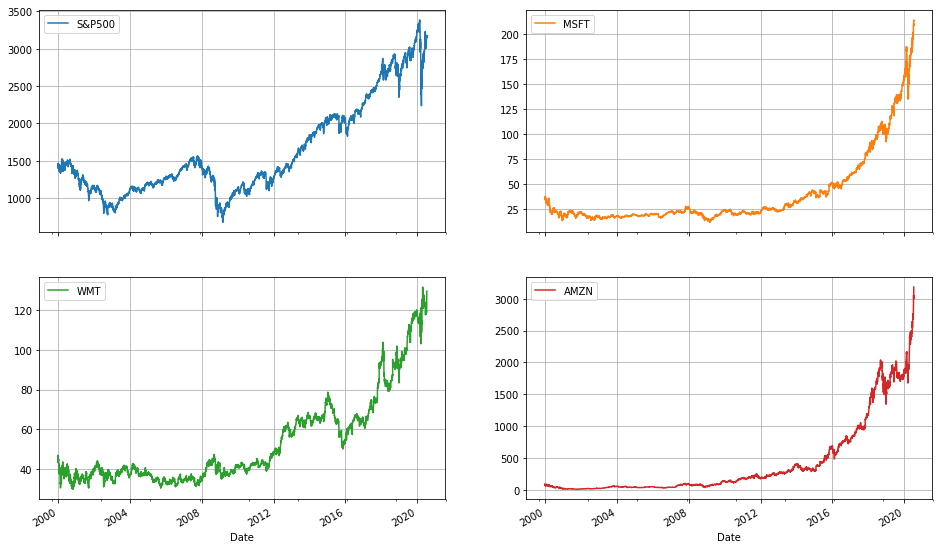

In [3]:
new_df.plot(subplots=True,layout=(2,2),grid=True,figsize=(16,10))

# 2 Ways of calculating returns

$ return = \frac{P_1}{P_0} - = \frac{P_1-P_0}{P_0} $

$ logreturn = ln \frac{P_1}{P_0} = ln (P_1) - ln (P_0) $

### Therefore, 2 ways of accumulatting returns:

### Using percentual returns:

$ \prod {(1 + ret_i)} - 1$

### Using log returns

$ e^ {\sum (logret_i)} - 1$

#### And some times to be conservative (for instance in our factor return cumulative plots) we simply use:

$ \sum^n { ret_i } $

Which should imply no re-investment of returns

In [4]:
#Calculating returns

#returns = price_1/price_0 -1
returns = new_df.pct_change()

#log_returns
log_rets = np.log(new_df) - np.log(new_df.shift())

def calc_returns(rets):
    log_rets = np.log(1 + rets)
    # Simpe addition
    cum_rets = rets.cumsum()
    # Log addition
    cum_logrets = np.exp(log_rets.cumsum()) - 1
    # Additional types of returns
    indexed_returns = rets2prices(rets)
    money_returns = indexed_returns * 1000

    return log_rets, cum_rets, cum_logrets, indexed_returns, money_returns

log_rets, cum_rets, cum_logrets, indexed_returns, money_returns = calc_returns(returns)

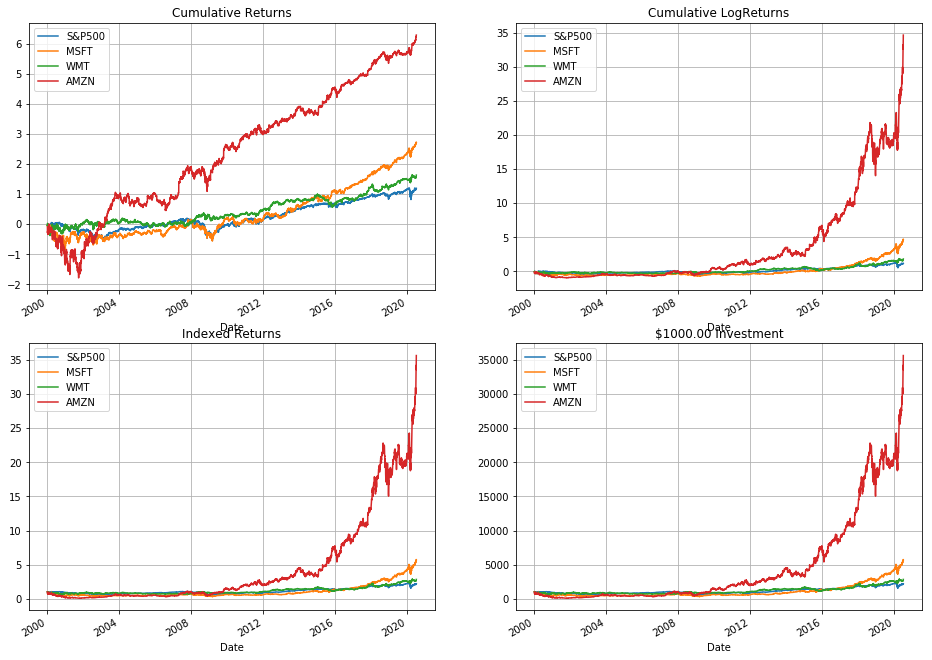

In [5]:
# Plots of returns
fig = plt.figure(figsize=(16,12))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)

cum_rets.plot(ax=ax1, title='Cumulative Returns', grid=True)
cum_logrets.plot(ax=ax2, title='Cumulative LogReturns', grid=True)
indexed_returns.plot(ax=ax3, title='Indexed Returns', grid=True)
money_returns.plot(ax=ax4, title='$1000.00 Investment', grid=True)

In [6]:
# Backtest
# Staticstics of returns and risk

def daily_drawdown(df):
    window = len(df)
    Roll_Max = df.rolling(window, min_periods=1).max()
    Daily_Drawdown = 100*(df-Roll_Max)/Roll_Max
    return Daily_Drawdown

def Backtest(rets):
    cols = ['Avg Returns', 'Avg Volatility', 'Sharpe Ratio', 'Max Drawdown']
    idx = rets.columns
    Stats = pd.DataFrame(columns=cols, index=idx)

    Stats['Avg Returns'] = rets.mean() *252 * 100
    Stats['Avg Volatility'] = rets.std() * np.sqrt(252) * 100

    # Risk-adjusted Average Return
    Stats['Sharpe Ratio'] = np.sqrt(252) * rets.mean() / rets.std()

    prices = rets2prices(rets)
    Daily_Drawdown = daily_drawdown(prices)
    Stats['Max Drawdown'] = Daily_Drawdown.min()

    return Stats, Daily_Drawdown

pd.set_option('display.precision', 2)
Stats, Daily_Drawdown = Backtest(returns)
Stats

,Avg Returns,Avg Volatility,Sharpe Ratio,Max Drawdown
S&P500,5.80,19.96,0.29,-56.78
MSFT,13.30,30.94,0.43,-68.71
WMT,7.97,24.05,0.33,-36.64
AMZN,30.68,51.91,0.59,-93.32


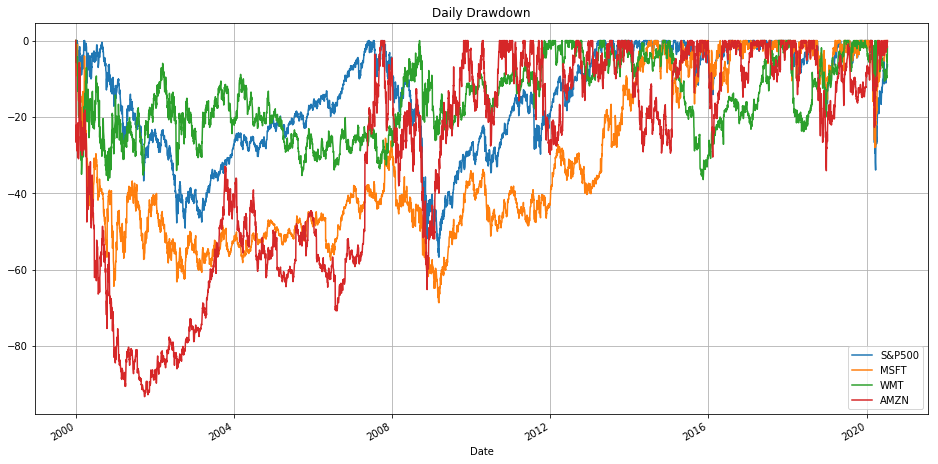

In [7]:
Daily_Drawdown.plot(title='Daily Drawdown', figsize=(16,8), grid=True)

In [8]:
InteractiveShell.ast_node_interactivity = 'all'
# A portfolio is just a vector of weight for instance 50% Walmart, 50% Microsoft
portfolio = [0.5, 0.5, 0.0]

# We need the portfolio returns
returns['Port_1'] = portfolio[0]*returns.MSFT + portfolio[1]*returns.WMT + portfolio[2]*returns.AMZN

# We need to recalculate cumulative returns
log_rets, cum_rets, cum_logrets, indexed_returns, money_returns = calc_returns(returns)

pd.set_option('display.precision',0)
print('Percentage Cumulative Return')
100*(cum_logrets.iloc[-1,:])
print()


Percentage Cumulative Return


S&P500     118
MSFT       473
WMT        183
AMZN      3464
Port_1     422
Name: 2020-07-10 00:00:00, dtype: float64

In [9]:
returns.head()

,S&P500,MSFT,WMT,AMZN,Port_1
Date,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN
2000-01-04,-4e-02,-3e-02,-4e-02,-8e-02,-4e-02
2000-01-05,2e-03,1e-02,-2e-02,-1e-01,-5e-03
2000-01-06,1e-03,-3e-02,1e-02,-6e-02,-1e-02
2000-01-07,3e-02,1e-02,8e-02,6e-02,4e-02


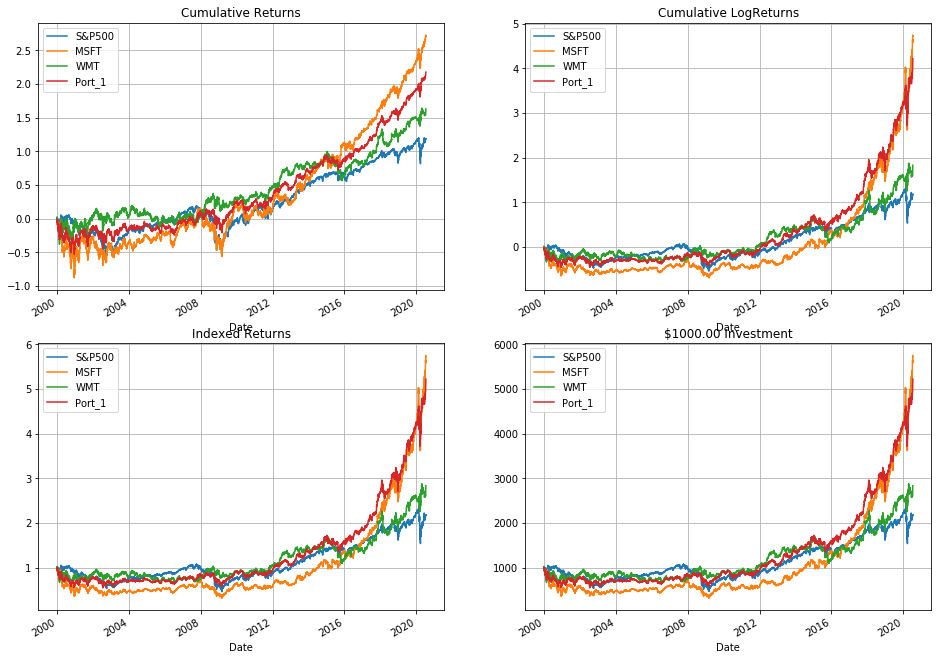

In [10]:
# Plots including porftolio but excluding Amazon for better detail viewing
fig = plt.figure(figsize=(16,12))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)

cum_rets.loc[:,cum_rets.columns != 'AMZN'].plot(ax = ax1 ,title = 'Cumulative Returns', grid = True)
cum_logrets.loc[:, cum_logrets.columns != 'AMZN'].plot(ax = ax2 ,title = 'Cumulative LogReturns', grid = True)
indexed_returns.loc[:, indexed_returns.columns != 'AMZN'].plot(ax = ax3 ,title = 'Indexed Returns', grid = True)
money_returns.loc[:, money_returns.columns != 'AMZN'].plot(ax = ax4 ,title = '$1000.00 Investment', grid = True)

In [11]:
pd.set_option('display.precision', 2)
Stats, Daily_Drawdown = Backtest(returns)
Stats

,Avg Returns,Avg Volatility,Sharpe Ratio,Max Drawdown
S&P500,5.80,19.96,0.29,-56.78
MSFT,13.30,30.94,0.43,-68.71
WMT,7.97,24.05,0.33,-36.64
AMZN,30.68,51.91,0.59,-93.32
Port_1,10.64,22.70,0.47,-45.38


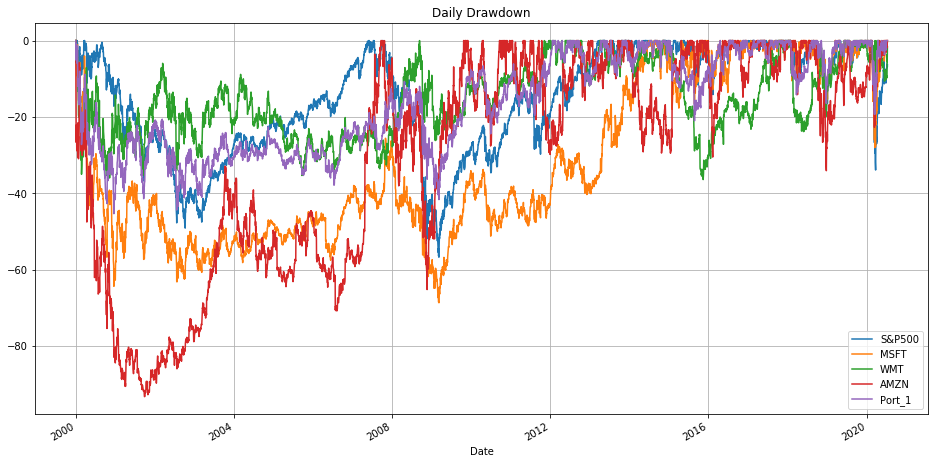

In [12]:
Daily_Drawdown.plot(title='Daily Drawdown', figsize = (16, 8), grid = True)

In [13]:
# A portfolio is just a vector of weights, for instance 1/3 Walmart, 1/3 Microsoft, 1/3 Amazon
portfolio2 = [1/3.0, 1/3.0, 1/3.0]

# We need the portfolio returns
returns['Port_2'] = portfolio2[0]*returns.MSFT + portfolio2[1]*returns.WMT + portfolio2[2]*returns.AMZN

# We need to recalculate cumulative returns
log_rets, cum_rets, cum_logrets, indexed_returns, money_returns = calc_returns(returns)

print('Percentage Cumulative Return')
100*(cum_logrets.iloc[-1,:])
print()


Percentage Cumulative Return


S&P500     117.91
MSFT       472.55
WMT        183.41
AMZN      3463.88
Port_1     422.03
Port_2    1535.28
Name: 2020-07-10 00:00:00, dtype: float64

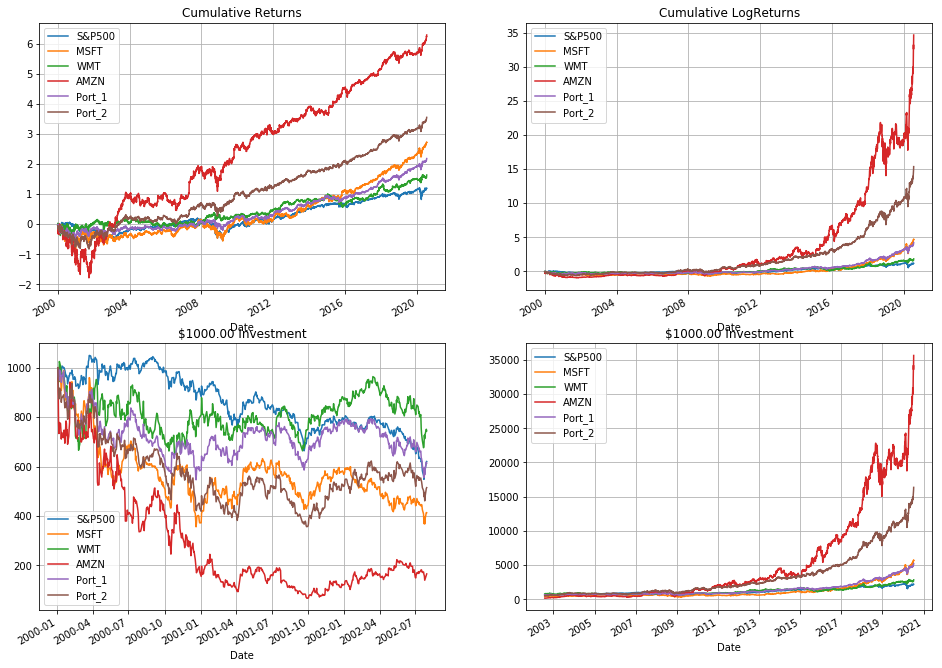

In [14]:
# Plots 
fig = plt.figure(figsize=(16,12))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)

cum_rets.plot(ax = ax1 ,title = 'Cumulative Returns', grid = True)
cum_logrets.plot(ax = ax2 ,title = 'Cumulative LogReturns', grid = True)
# Plot money returns in 2 separeate plots so we can appreciate the first few years of the timeseries
money_returns.iloc[:len(money_returns)//8, :].plot(ax = ax3 ,title = '$1000.00 Investment', grid = True)
money_returns.iloc[len(money_returns)//8:, :].plot(ax = ax4 ,title = '$1000.00 Investment', grid = True)

# Let's Emphasize maximum drawdown

#### This is a very ilustrative story ####
- You tell your parents and friends that you saved \$1000 and you are going to invest them in the stock market
- Dad tells you that for sure you want to inst in a broad market index like S&P500 because it's diversified and less risky.
- Ge invest his own \$1000 in S&P500
- Mom ships at Walmart so she decides to invest \$1000 in Walmart's stock at the same time
- But you are smarter than that, you've identified a stock that is very promising: Amazon.com and you put all your money on it
- By September 2001, a little over a year down, dotcom bubbles goes burst
    - Now your dad's investment is woth \$706.45
    - Your mom's investment is worth \$876.00
    - But your own investment is worth \$158.16
    - What's even worse, by November mom's investment is above water level, with a worth of \$1019.48. while your is still at \$203.07
- And then if you decided to keep the investment going, it would have taken you 2 more year to recover to your original \$1000 level.
- Yes, by 2019 you have the largest return for about 23 times your original value, that's your reward for holding that much risk for such a long time, however it could have easily resulted in disaster had Amazon gone bankrupt during the dotcom crisis.
    



In [15]:
# Let's emphasize maximum drawdown
print('\nInitial Price\n')
new_df.iloc[0]
print('\nMinimum Price\n')
new_df.min()
print('\nMinimum value of $1000 USD investment\n')
1000*new_df.min()/new_df.iloc[0]


Initial Price



S&P500    1455.22
MSFT        37.29
WMT         45.75
AMZN        89.38
Name: 2000-01-03 00:00:00, dtype: float64


Minimum Price



S&P500    676.53
MSFT       11.67
WMT        29.72
AMZN        5.97
dtype: float64


Minimum value of $1000 USD investment



S&P500    464.90
MSFT      312.87
WMT       649.58
AMZN       66.80
dtype: float64

In [16]:
pd.set_option('display.precision', 2)
Stats, Daily_Drawdown = Backtest(returns)
Stats

,Avg Returns,Avg Volatility,Sharpe Ratio,Max Drawdown
S&P500,5.80,19.96,0.29,-56.78
MSFT,13.30,30.94,0.43,-68.71
WMT,7.97,24.05,0.33,-36.64
AMZN,30.68,51.91,0.59,-93.32
Port_1,10.64,22.70,0.47,-45.38
Port_2,17.32,27.18,0.64,-64.38


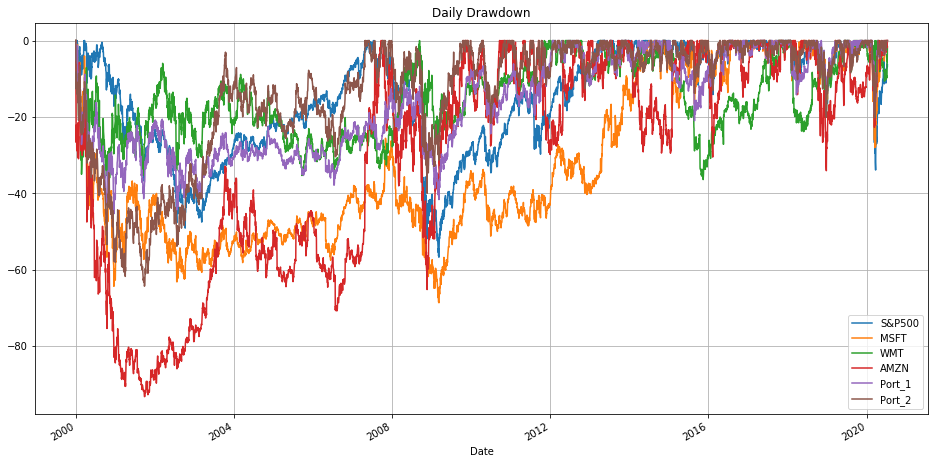

In [17]:
Daily_Drawdown.plot(title='Daily Drawdown', figsize = (16,8), grid = True)

In [18]:
Daily_Drawdown.mean()

S&P500   -14.97
MSFT     -31.58
WMT      -15.32
AMZN     -29.61
Port_1   -16.22
Port_2   -13.13
dtype: float64

In [19]:
InteractiveShell.ast_node_interactivity = "all"
# We calculate and print the correlation matrix
returns.corr()

# How about monthly return correlation

# Let's compare Annual returns from Amazon and Walmart to gain understanding on Correlation
# Question is: how often do they move in the same direction?

,S&P500,MSFT,WMT,AMZN,Port_1,Port_2
S&P500,1.00,0.70,0.52,0.47,0.75,0.72
MSFT,0.70,1.00,0.35,0.41,0.87,0.75
WMT,0.52,0.35,1.00,0.23,0.77,0.57
AMZN,0.47,0.41,0.23,1.00,0.40,0.86
Port_1,0.75,0.87,0.77,0.40,1.00,0.81
Port_2,0.72,0.75,0.57,0.86,0.81,1.00


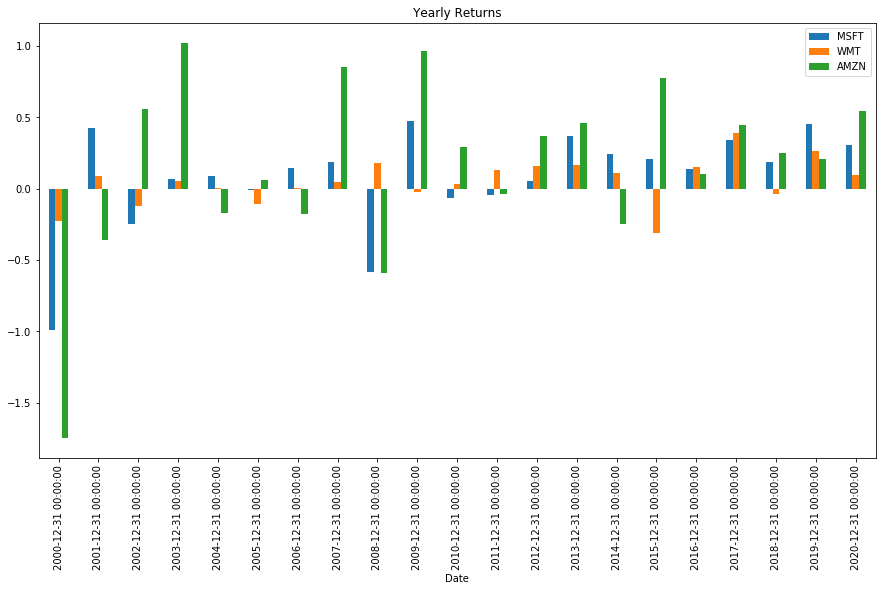

In [20]:
cols = ['MSFT', 'WMT', 'AMZN']
(log_rets[cols].resample('A').sum()).plot.bar(figsize = (15 ,8), title = 'Yearly Returns')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029BF4D6D198>,
      dtype=object)

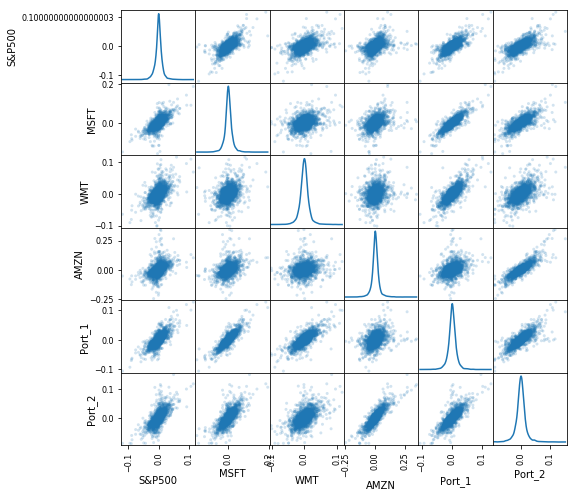

In [21]:
pd.plotting.scatter_matrix(returns, alpha = 0.2, figsize = (8,8), diagonal = 'kde')

# Homework

Create different combinations of portfolios using these same 3 stocks.

Can you find the "optimal" porfolio?

- The optimal portfolio is the ona that results in the largest Sharpe Ratio

Note: you can vary the weights any way you want, even use negative weights.

See exampples below!

Only 1 retriction:
    -All weights always add up to 1.0
    
Hint: The answer doesn't use negative weights, but you may play with them so you learn.

## Special price for the person/team (you can colaborate) who finds the largest Sharpe Ratio possible. ##

In [22]:
# We call this one 130/30 because it is 130% "long" and 30% "short"
portfolio = np.array([0.5, 0.8, -0.3])
print(np.sum(portfolio) == 1)
print(np.sum(portfolio[portfolio>0]) <= 2.0)
print(np.sum(portfolio[portfolio<0]) >= -2.0)
print()

portfolio = np.array([1.0, 1.0, -1.0])
print(np.sum(portfolio) == 1)
print(np.sum(portfolio[portfolio>0]) <= 2.0)
print(np.sum(portfolio[portfolio<0]) >= -2.0)
print()

# Another example
portfolio = np.array([0.5, 0.2, 0.3])
print(np.sum(portfolio) == 1)
print(np.sum(portfolio[portfolio>0]) <= 2.0)
print(np.sum(portfolio[portfolio<0]) >= -2.0)

True
True
True

True
True
True

True
True
True
